In [1]:
from api import API

/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
Using TensorFlow backend.
/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: 

In [2]:

redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'artificial_aggregate':True,
  'appliances': ['fridge','air conditioner','electric furnace','washing machine'],
  'methods': {
     'Mean': {},"FHMM_EXACT":{},"RNN":{},"Seq2Point":{},"Seq2Seq":{},"DAE":{},"WindowGRU":{}
  },
   'train': {    
    'datasets': {
            'Dataport': {
                'path': '../dataport3.hdf5',
				'buildings': {
				10: {
					'start_time': '2015-04-04',
					'end_time': '2015-04-24'
				},
				15: {
					'start_time': '2015-04-30',
					'end_time': '2015-05-20'
				}
				}
				                
			}
			}
	},
	'test': {
	'datasets': {
		'Datport': {
			'path': '../dataport3.hdf5',
			'buildings': {
				10: {
					'start_time': '2015-04-25',
					'end_time': '2015-05-01'
					},
				15: {
					'start_time': '2015-05-20',
					'end_time': '2015-05-27'
					}
			}
	}
},
        'metrics':['mae']
}
}


Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Creating an Artificial Aggregate
 test New mains shape
(8848, 99, 1)
New testing
Length
8848
Max input
-0.185 -3.0
test predictions  [         fridge  air conditioner  electric furnace  washing machine
0     38.219112       987.922302        333.257782         1.894055
1     38.092224       982.272156        331.765320         1.894055
2     37.713924       950.586975        325.546783         1.894055
3     37.508259       935.073730        322.853821         1.894055
4     37.306335       934.158020        322.764435         1.894055
5     37.543049       936.230957        323.070801         1.894055
6     37.606354       936.305115        323.088165         1.894055
7     37.786251       935.893555        323.015442         1.894055
8     37.899300       937.757690        323.284119         1.894055
9     37.952000       935.181030        322.887390         1.894055
10    37.995159       934.

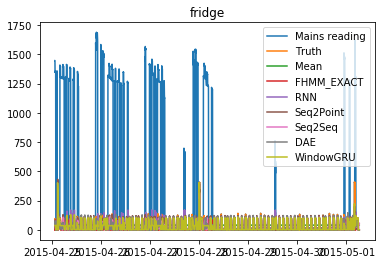

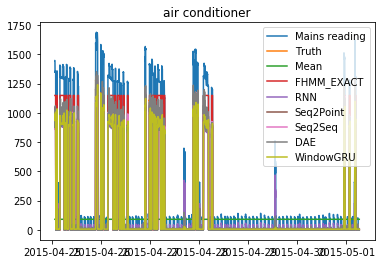

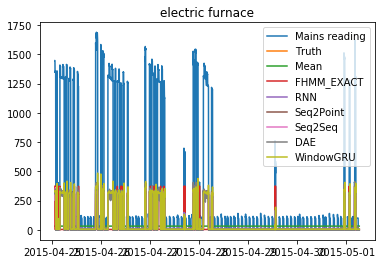

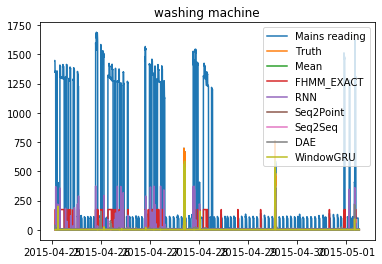

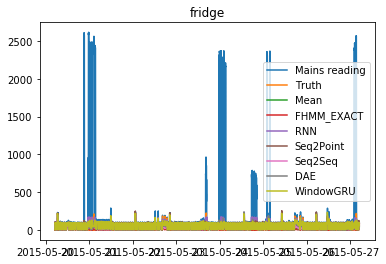

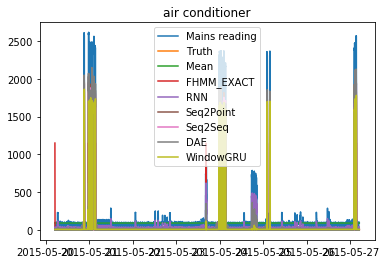

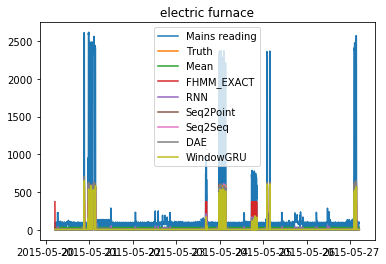

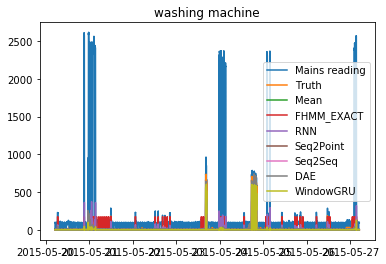

In [3]:
api_res = API(redd)

In [7]:
for i in api_res.errors:
    print (i)

                        Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
fridge             48.931244   15.815448  11.712293   9.029251  14.784893   
air conditioner   217.217117   27.830650  24.181311   8.984860  13.729848   
electric furnace   70.432358   50.480328   8.101933   7.159814   7.332456   
washing machine     7.248257   18.582607   8.790622   6.902098   3.365578   

                        DAE  WindowGRU  
fridge            18.046366  12.008795  
air conditioner   14.579238  15.509682  
electric furnace   7.380935   7.906546  
washing machine    4.278712   2.576997  
                        Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
fridge             39.046425   12.326984   9.925792  10.433362  14.678424   
air conditioner   135.736282   21.231747  26.932943   5.304407  11.566384   
electric furnace   42.080956   14.295834   9.099463   1.358259   5.584289   
washing machine    15.130778   17.044842   9.533607  15.267018   9.830998   

                       

In [8]:
import numpy as np
import pandas as pd

In [9]:
vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_res.errors],axis=2)


cols = api_res.errors[0].columns
indexes = api_res.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("Variance")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                        Mean  FHMM_EXACT        RNN  Seq2Point    Seq2Seq  \
fridge             43.988834   14.071216  10.819042   9.731307  14.731658   
air conditioner   176.476700   24.531199  25.557127   7.144634  12.648116   
electric furnace   56.256657   32.388081   8.600698   4.259037   6.458372   
washing machine    11.189517   17.813725   9.162114  11.084558   6.598288   

                        DAE  WindowGRU  
fridge            16.603221  10.187744  
air conditioner   12.319127  11.232468  
electric furnace   6.499024   5.768851  
washing machine    7.040783   4.983148  



Variance
                       Mean  FHMM_EXACT       RNN  Seq2Point   Seq2Seq  \
fridge             4.942410    1.744232  0.893250   0.702055  0.053235   
air conditioner   40.740417    3.299452  1.375816   1.840227  1.081732   
electric furnace  14.175701   18.092247  0.498765   2.900778  0.874084   
washing machine    3.941261    0.768883  0.371492   4.182460  3.232710   

                  